In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("hulu_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [15]:
print("Total de entradas: ", df.shape[0])

df.info()
df.isnull().sum()

Total de entradas:  3073
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [16]:
# Limpeza
df_clean = df.drop(["description", "cast", "director"], axis=1)

df_clean["rating"] = df_clean["rating"].fillna("Unknown")

df_clean.isnull().sum()


show_id            0
type               0
title              0
country         1453
date_added        28
release_year       0
rating             0
duration         479
listed_in          0
dtype: int64

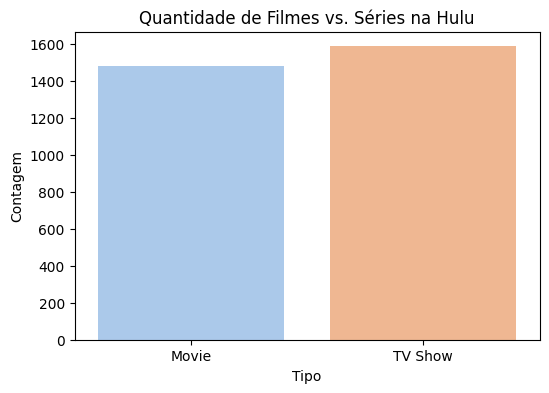

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x="type", data=df_clean, hue="type", palette="pastel")
plt.title("Quantidade de Filmes vs. Séries na Hulu")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()

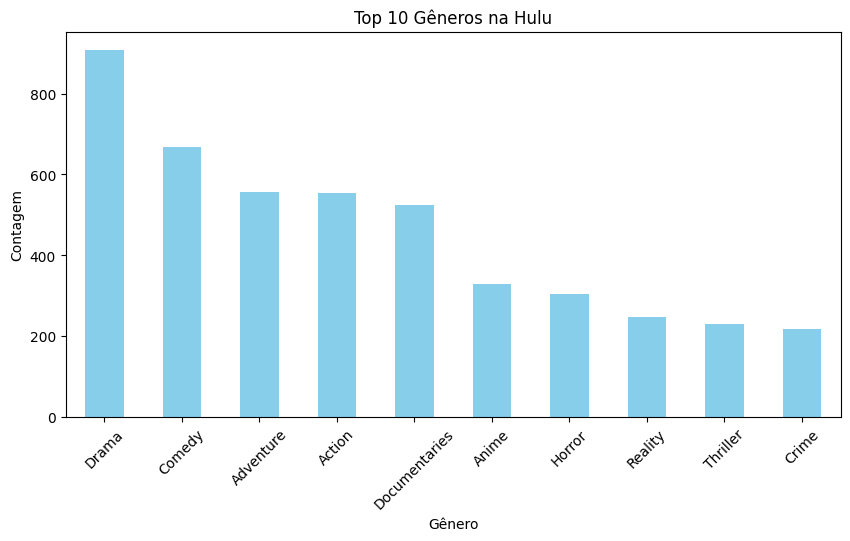

In [18]:
# Gêneros mais Populares
genres = df_clean["listed_in"].str.split(", ", expand=True).stack()

genre_counts = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
genre_counts.plot(kind="bar", color="skyblue")
plt.title("Top 10 Gêneros na Hulu")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

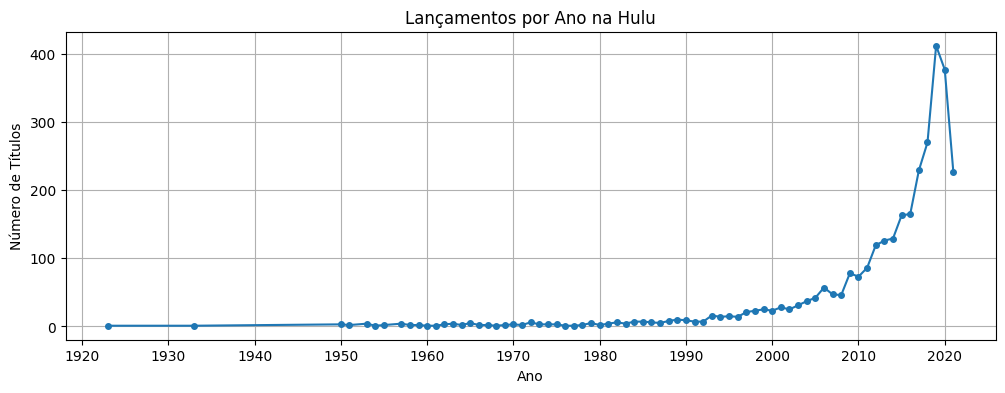

In [19]:
# Lançamentos por Ano
year_counts = df_clean["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 4))
year_counts.plot(kind="line", color="#1f77b4", marker="o", markersize=4)  
plt.title("Lançamentos por Ano na Hulu")
plt.xlabel("Ano")
plt.ylabel("Número de Títulos")
plt.xticks(range(1920, 2021, 10))
plt.grid() 
plt.show()